In [17]:
import os
import base64
import json
import matplotlib.pyplot as plt
from PIL import Image

In [18]:
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

# Define the folder path containing the images
folder_path = "NFTVS_IMAGE"

# Get a list of all image files in the folder
image_files = [file for file in os.listdir(folder_path) if file.endswith(('jpg', 'jpeg', 'png'))]

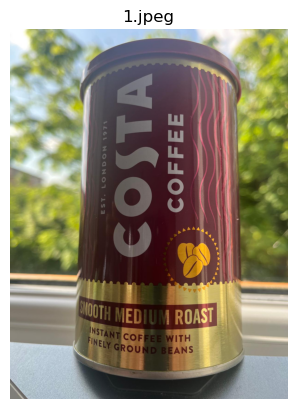

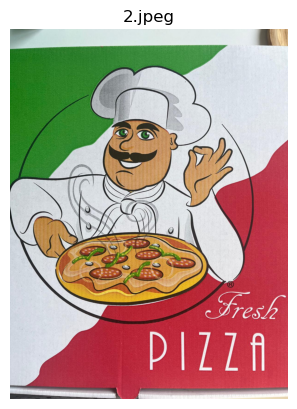

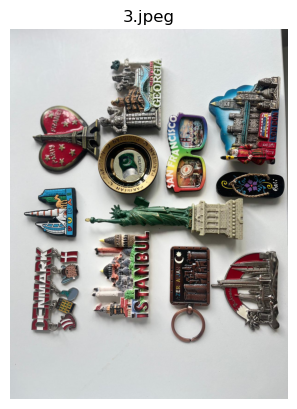

In [20]:
# Display images before asking for CID
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis
    plt.title(image_file)  # Set title as image filename
    plt.show()

In [21]:
# Prompt the user to input the CID for the folder
print('Enter the CID for the folder "NFTVS_IMAGE":')
folder_cid = input()

Enter the CID for the folder "NFTVS_IMAGE":
QmdHdFG5fZ2854X4rohjG61vTJGi6H7CCZeDR4xCA7vLxS


In [22]:
# Create a directory for JSON files if it doesn't exist
json_folder = "NFTVS_JSON"
if not os.path.exists(json_folder):
    os.makedirs(json_folder)

# Define descriptions and keywords for each image based on filenames
descriptions = {
    '1.jpeg': 'Costa Coffee',
    '2.jpeg': 'Pizza',
    '3.jpeg': 'Souvenirs'
}

keywords = {
    '1.jpeg': ['Coffee Break'],
    '2.jpeg': ['Feeling Hungry'],
    '3.jpeg': ["Let's Travel"]
}

# Construct the CID
cid = folder_cid

# Iterate over each image
for idx, image_file in enumerate(image_files, start=1):
    # Construct the image URI by appending the filename to the CID
    image_uri = f'ipfs://{cid}/{image_file}'

    # Open the image file
    image_path = os.path.join(folder_path, image_file)
    img = Image.open(image_path)

    # Prepare JSON data for the image (without base64 data)
    image_data = {
        "name": f"NFT #{idx}",
        "description": descriptions.get(image_file, ''),
        "image": image_uri,
        "attributes": [
            {
                "trait_type": "Keywords",
                "value": keywords.get(image_file, [])
            },
            {
                "trait_type": "Width",
                "value": img.width
            },
            {
                "trait_type": "Height",
                "value": img.height
            },
            {
                "trait_type": "File Size",
                "value": os.path.getsize(image_path)
            },
            {
                "trait_type": "Color Space",
                "value": img.mode
            },
            {
                "trait_type": "Compression",
                "value": img.format
            },
            {
                "trait_type": "Creation Date",
                "value": "2024-05-10"
            },
            {
                "trait_type": "Author",
                "value": "Versha"
            }
        ]
    }

    # Save the JSON data to a file in the "NFTVS_JSON" folder
    with open(os.path.join(json_folder, f'image_{idx}.json'), 'w') as json_file:
        json.dump(image_data, json_file, indent=4)

print("Images converted and JSON files saved to 'NFTVS_JSON' folder successfully!")

Images converted and JSON files saved to 'NFTVS_JSON' folder successfully!
